# Covid19 Korea

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
Case = pd.read_csv('/content/drive/My Drive/covid/Case.csv')
PatientInfo = pd.read_csv('/content/drive/My Drive/covid/PatientInfo.csv')
PatientRoute = pd.read_csv('/content/drive/My Drive/covid/PatientRoute.csv')
Region = pd.read_csv('/content/drive/My Drive/covid/Region.csv')
SearchTrend = pd.read_csv('/content/drive/My Drive/covid/SearchTrend.csv')
SeoulFloating = pd.read_csv('/content/drive/My Drive/covid/SeoulFloating.csv')
Time = pd.read_csv('/content/drive/My Drive/covid/Time.csv')
TimeAge = pd.read_csv('/content/drive/My Drive/covid/TimeAge.csv')
TimeGender = pd.read_csv('/content/drive/My Drive/covid/TimeGender.csv')
TimeProvince = pd.read_csv('/content/drive/My Drive/covid/TimeProvince.csv')
Weather = pd.read_csv('/content/drive/My Drive/covid/Weather.csv')

## Case

In [0]:
Case

,case_id,province,city,group,infection_case,confirmed,latitude,longitude
0,1000001,Seoul,Guro-gu,True,Guro-gu Call Center,79,37.508163,126.884387
1,1000002,Seoul,Dongdaemun-gu,True,Dongan Church,24,37.592888,127.056766
2,1000003,Seoul,Eunpyeong-gu,True,Eunpyeong St. Mary's Hospital,14,37.63369,126.9165
3,1000004,Seoul,Seongdong-gu,True,Seongdong-gu APT,13,37.55713,127.0403
4,1000005,Seoul,Jongno-gu,True,Jongno Community Center,10,37.57681,127.006
...,...,...,...,...,...,...,...,...
76,6100004,Gyeongsangnam-do,Changwon-si,True,Hanmaeum Changwon Hospital,7,35.22115,128.6866
77,6100005,Gyeongsangnam-do,Changnyeong-gun,True,Changnyeong Coin Karaoke,7,35.54127,128.5008
78,6100006,Gyeongsangnam-do,from other city,True,Onchun Church,2,-,-
79,6100007,Gyeongsangnam-do,-,False,etc,19,-,-


In [0]:
Case.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 8 columns):
case_id           81 non-null int64
province          81 non-null object
city              81 non-null object
group             81 non-null bool
infection_case    81 non-null object
confirmed         81 non-null int64
latitude          81 non-null object
longitude         81 non-null object
dtypes: bool(1), int64(2), object(5)
memory usage: 4.6+ KB


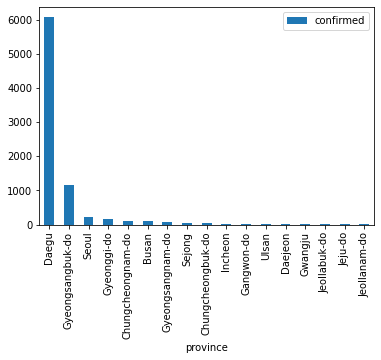

In [84]:
df_Case = Case[['confirmed', 'province']].groupby('province').sum().sort_values(by = 'confirmed', ascending = False)
df_Case.plot(kind = 'bar')

In [87]:
Case.province.unique()

array(['Seoul', 'Busan', 'Daegu', 'Gwangju', 'Incheon', 'Daejeon',
       'Ulsan', 'Sejong', 'Gyeonggi-do', 'Gangwon-do',
       'Chungcheongbuk-do', 'Chungcheongnam-do', 'Jeollabuk-do',
       'Jeollanam-do', 'Gyeongsangbuk-do', 'Gyeongsangnam-do', 'Jeju-do'],
      dtype=object)

## PatientRoute

In [85]:
import folium
southkorea_map = folium.Map(location = [36.55, 126.983333 ], zoom_start = 7)

for lat, lon, num in zip(PatientRoute['latitude'], PatientRoute['longitude'], PatientRoute['city']):
    folium.CircleMarker([lat, lon], 
                        radius = 5,
                        color = 'red',
                        popup = ('Number of Confirmed patients : ' + str(num) + '<br>'),
                        fill_color = 'red',
                        fill_opacity = 0.7).add_to(southkorea_map)
southkorea_map